<a href="https://colab.research.google.com/github/codybaraks/Mchezopesa-Ltd/blob/master/Mchezopesa_Ltd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DEFINE QUESTION**
A Prediction result of a game between team 1 and team 2, based on 

who's home and who's away, and on whether or not the game is 

friendly (include rank in your training).

## **METRICS FOR SUCCESS**
Come up with a model that can predict goals the home team scores
Come up with a model that can predict the away team scores

Using Polynomial regression, and  Root Mean Squared Error which will be used to measure the performace of the model.

## **THE CONTEXT**

Dataset that provided results of matches and ranking national Teams 

## **EXPERIEMENTAL DESIGN**


Expected flow for the assessment:
- Perform your EDA

- Perform any necessary feature engineering
- Check of multicollinearity


- Start building the model
- Cross-validate the model


- Compute RMSE
- Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test






In [0]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
# logistic
from sklearn.linear_model import LogisticRegression
%matplotlib inline
# Import time date
import datetime
import scipy as sc
# Checking for performance of an algorithm
from sklearn.metrics import confusion_matrix
#  from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold

In [151]:
# Load fifa ranking dataset
fifa_ranking = pd.read_csv("fifa_ranking.csv")
fifa_ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [152]:
# Loading the Dataset
# Reading the dataset
fifa = pd.read_csv("results.csv")
fifa.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [8]:
# fifa ranking shape
fifa_ranking.shape

(57793, 16)

In [9]:
# Checking the shape of the results dataset
fifa.shape

(40839, 9)

Consists of about 9 columns

In [10]:
# fifa ranking size
fifa_ranking.size

924688

In [11]:
# Check the size of the results dataset
fifa.size


367551

In [12]:
# results fifa ranking dataset info
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [13]:
# Getting  a bit information from the dataframe
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [14]:
# Describing the data
fifa.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [15]:
pp.ProfileReport(fifa) # pandas


Number of variables,9
Number of observations,40839
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,65.0 B
Numeric,2
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [16]:
fifa_ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB


In [0]:
# ## Dropping irrelevant columns  -  fifa ranking
fifa_ranking.drop(columns=['country_abrv','cur_year_avg',
      'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
      'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
      'three_year_ago_weighted'], inplace=True)

In [154]:
fifa_ranking.dtypes

rank                 int64
country_full        object
total_points       float64
previous_points      int64
rank_change          int64
confederation       object
rank_date           object
dtype: object

In [0]:
# convert column date into datetime format
# import datetime
# convert column date into datetime format

fifa['date'] = pd.to_datetime(fifa['date'])
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])

# splitting the datetime column into month and year
fifa['year'], fifa['month'] = fifa['date'].dt.year, fifa['date'].dt.month
fifa_ranking['year'], fifa_ranking['month'] = fifa_ranking['rank_date'].dt.year, fifa_ranking['rank_date'].dt.month

In [156]:
fifa = fifa_main.rename({'rank': 'home_team_rank'}, axis = 1)
fifa.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'away_team_rank', 'country_abrv_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x',
       'home_team_rank', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y'],
      dtype='object')

In [147]:
# fifa = fifa_main.rename({'rank': 'away_team_rank'}, axis = 1)
# fifa.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month',
       'away_team_rank', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date'],
      dtype='object')

In [0]:
# Merge the two datasets
# "pd.merge(df1, df2, on='employee')"
# fifa_main = pd.concat([fifa_ranking, fifa, on=""], axis=1 )
# fifa_main
# pd.merge(fifa_ranking, fifa, on='employee')")

fifa_main = fifa_ranking
fifa_main=fifa_main.rename({'country_full': 'home_team'}, axis=1)
fifa_main=pd.merge(fifa, fifa_main, how='left', on=['home_team', 'year', 'month'])

In [0]:
fifa = fifa_main.rename({'rank': 'away_team_rank'}, axis = 1)
fifa.columns

In [21]:
fifa_main.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,total_points,previous_points,rank_change,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,NaN,NaN,NaN,NaN,NaN,NaT


In [22]:
fifa_main.shape

(40908, 17)

In [23]:
# Checking for null values after concatinating
fifa_main.isnull().sum()

date                   0
home_team              0
away_team              0
home_score             0
away_score             0
tournament             0
city                   0
country                0
neutral                0
year                   0
month                  0
rank               22299
total_points       22299
previous_points    22299
rank_change        22299
confederation      22299
rank_date          22299
dtype: int64

In [0]:
# Drop all missing values
fifa_main=fifa_main.dropna()

In [26]:
# Checking if null values are removed
fifa_main.isnull().sum()

date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
city               0
country            0
neutral            0
year               0
month              0
rank               0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

In [0]:
# Convert to neutral column to Binary
conv = pd.get_dummies(fifa_main['neutral'], drop_first=True)
conv

In [0]:
fifa_main["neutral"]= conv[True]

In [29]:
# # Checking corelation
# sns.heatmap(fifa_main)
fifa_main.dtypes

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                     uint8
year                        int64
month                       int64
rank                      float64
total_points              float64
previous_points           float64
rank_change               float64
confederation              object
rank_date          datetime64[ns]
dtype: object

In [30]:
fifa_main['home_score'].corr(fifa_main['rank'])

-0.11143973207725796

In [31]:
fifa_main.shape

(18609, 17)

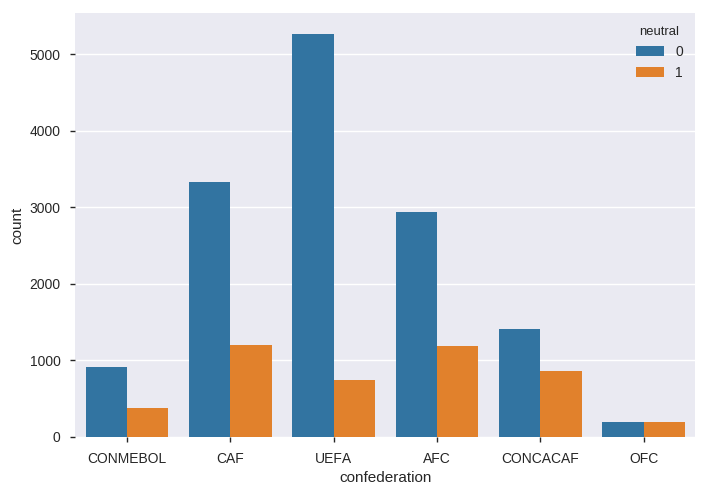

In [32]:
sns.countplot(x='confederation', data=fifa_main, hue='neutral')

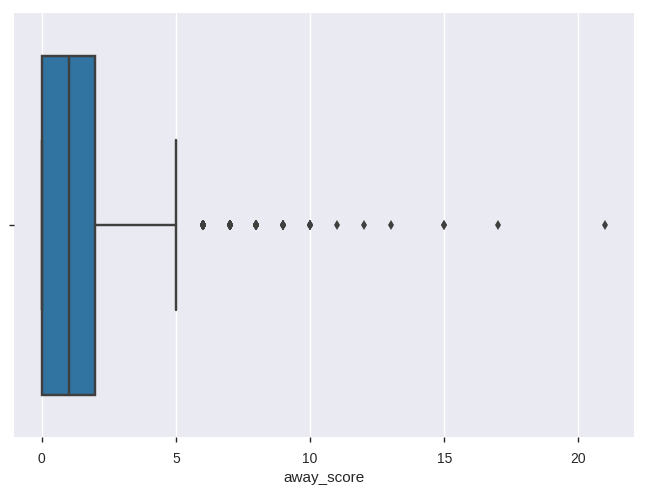

In [33]:
# Away score outliers
sns.boxplot(x = 'away_score',hue='home_score',data=fifa_main)

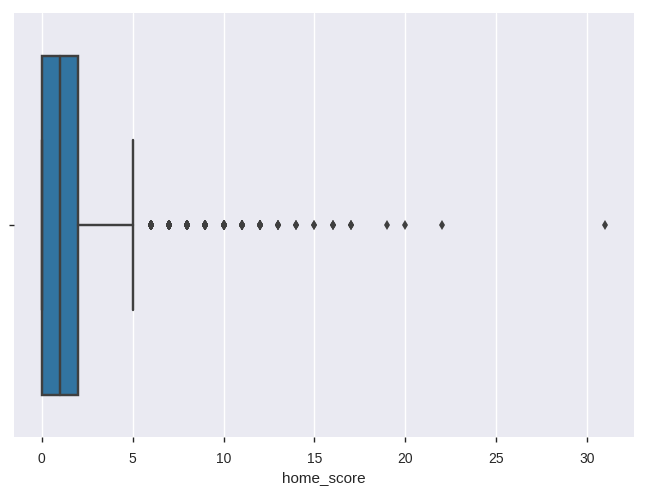

In [34]:
# Home score outliers
sns.boxplot(x = 'home_score',hue='away_score',data=fifa_main)

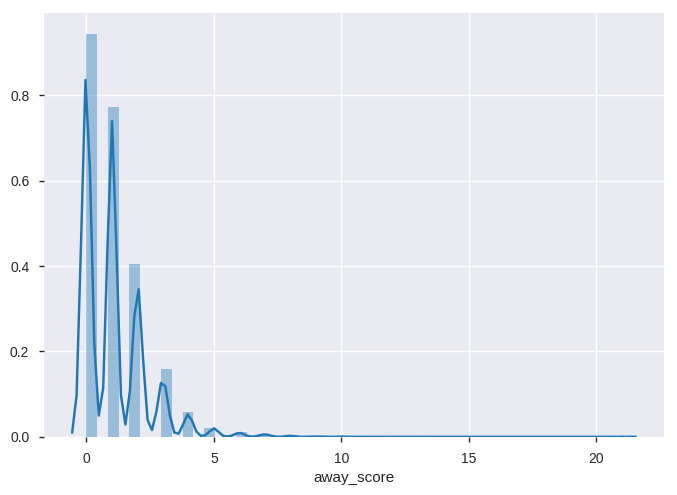

In [35]:
# Distribution plot fo away score
# distplot
sns.distplot(fifa_main['away_score'])

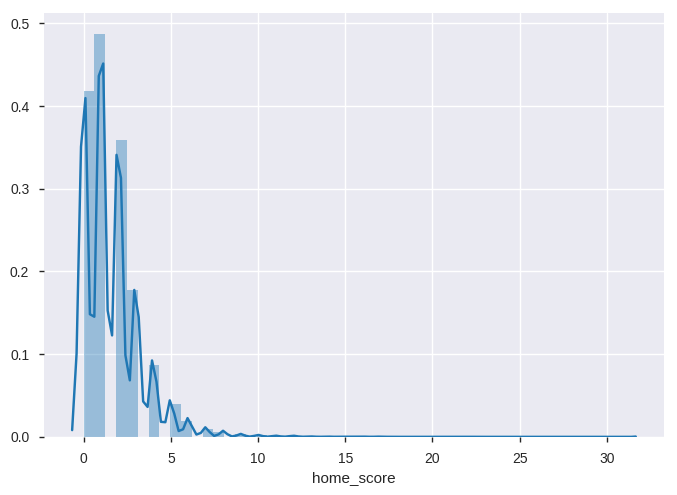

In [36]:
sns.distplot(fifa_main['home_score'])

In [37]:
fifa_main.dtypes

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                     uint8
year                        int64
month                       int64
rank                      float64
total_points              float64
previous_points           float64
rank_change               float64
confederation              object
rank_date          datetime64[ns]
dtype: object

### Multicollinearity

In [131]:
fifa_main.dtypes

date                 datetime64[ns]
home_team                    object
away_team                    object
home_score                    int64
away_score                    int64
tournament                   object
city                         object
country                      object
neutral                        bool
year                          int64
month                         int64
home_team_rank              float64
total_points_x              float64
previous_points_x           float64
rank_change_x               float64
confederation_x              object
rank_date_x          datetime64[ns]
away_team_rank              float64
total_points_y              float64
previous_points_y           float64
rank_change_y               float64
confederation_y              object
rank_date_y          datetime64[ns]
rank                        float64
total_points                float64
previous_points             float64
rank_change                 float64
confederation               

In [161]:
multicollinearity = fifa_main[['home_score', 'home_team_rank', 'away_team','away_team_rank']].corr()
multicollinearity.head()

,home_score,home_team_rank,away_team_rank
home_score,1.000000,-0.109734,-0.109734
home_team_rank,-0.109734,1.000000,0.999947
away_team_rank,-0.109734,0.999947,1.000000


In [162]:

## Creating the VIF 
multicollinearity_vif = pd.DataFrame(np.linalg.inv(multicollinearity.values), index= multicollinearity.index, columns = multicollinearity.columns)
multicollinearity_vif

,home_score,home_team_rank,away_team_rank
home_score,1.012189,0.055537,0.055537
home_team_rank,0.055537,9390.125653,-9389.619545
away_team_rank,0.055537,-9389.619545,9390.125653


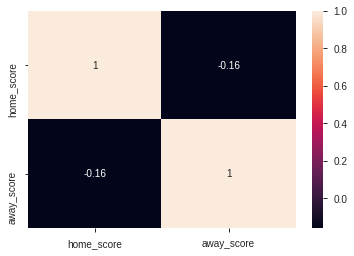

In [163]:
# Creating a heatmap for collinear
sns.heatmap(multicolinearity, annot=True)

## **Polynomial Regression -  Approach 1**

In [0]:
# Checking if columns have been droped
# X.head(5)

In [39]:
# sns.heatmap(X)
fifa_main['home_score'].corr(fifa_main['rank'])

-0.11143973207725796

In [40]:
fifa_main['home_score'].corr(fifa_main['total_points'])

0.0236779016087724

In [41]:
fifa_main['home_score'].corr(fifa_main['previous_points'])

0.07279723031569617

In [42]:
fifa_main['home_score'].corr(fifa_main['rank_change'])

0.07970641961503759

In [43]:
fifa_main.dtypes

date               datetime64[ns]
home_team                  object
away_team                  object
home_score                  int64
away_score                  int64
tournament                 object
city                       object
country                    object
neutral                     uint8
year                        int64
month                       int64
rank                      float64
total_points              float64
previous_points           float64
rank_change               float64
confederation              object
rank_date          datetime64[ns]
dtype: object

In [0]:
# Split the dataset
# X = wine.drop(['quality'],axis=1)
# X = fifa_main.drop(['country_full','country_abrv','confederation','rank_date','date', 'home_team','away_team','tournament','city','country'],axis=1)
X = fifa_main['home_team_rank'].values
y = fifa_main['home_score'].values

X = X.reshape(-1,1)
# y = y.reshape(-1,1)

In [187]:
print(X)
print(y)

[[19.]
 [70.]
 [22.]
 ...
 [12.]
 [ 7.]
 [14.]]
[0 0 0 ... 0 4 2]


In [0]:
# Import train test split
from sklearn.model_selection import train_test_split

In [0]:
# Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [190]:
X.shape

(19023, 1)

In [191]:
y.shape

(19023,)

In [192]:
# Fit polynormial regression to dataset
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

pol_li = LinearRegression()
pol_li.fit(X_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
# Fit a Linear Regression
fifa_reg = LinearRegression()
fifa_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: ignored

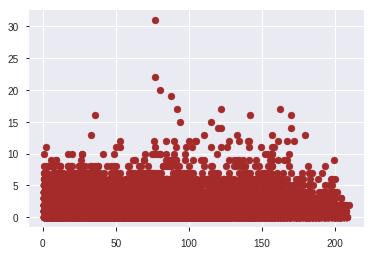

In [195]:
  # Plotting LogisticRegression

plt.scatter(X,y,color="brown")
plt.plot(X, pol_li.predict(X), color="red")
plt.title("Home scores And  Rank", color="brown")
plt.xlabel("Ranking",color="brown")
plt.ylabel("Home Score",color="brown")

In [0]:
# Carrying out the prediction
# Predict using Polynomial Regression

X_predict = fifa_reg.predict(X_poly)


Text(0, 0.5, 'Home Score')

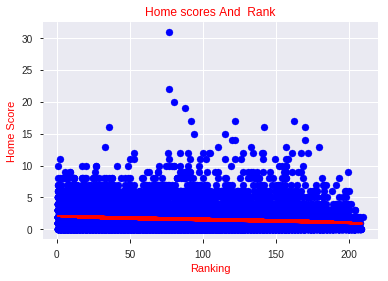

In [197]:
plt.scatter(X,y,color="blue")
plt.plot(X,X_predict,color="red")
plt.title("Home scores And  Rank", color="red")
plt.xlabel("Ranking",color="red")
plt.ylabel("Home Score",color="red")

In [198]:
# Checking the number of unique values
fifa_main['rank'].nunique()

209

In [199]:
print("prediction for linear Regression is",y)

prediction for linear Regression is [0 0 0 ... 0 4 2]


In [58]:
# Polynomial Regression Predition
print("prediction for Polynomial Regression is", X_predict)

prediction for Polynomial Regression is [1.87054556 1.5617355  1.8377733  ... 1.9561792  2.02565948 1.93036247]


In [59]:
# Viewing the predicted
X_predict

array([1.87054556, 1.5617355 , 1.8377733 , ..., 1.9561792 , 2.02565948,
       1.93036247])

In [60]:
fifa_main.describe()

,home_score,away_score,neutral,year,month,rank,total_points,previous_points,rank_change
count,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000,18609.000000
mean,1.622817,1.074910,0.245096,2006.467784,6.889462,77.831157,163.009199,425.994841,0.981998
std,1.660216,1.261695,0.430156,6.816722,3.285789,51.263254,309.043083,316.326216,6.915482
min,0.000000,0.000000,0.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,-62.000000
25%,0.000000,0.000000,0.000000,2001.000000,4.000000,34.000000,0.000000,164.000000,-2.000000
50%,1.000000,1.000000,0.000000,2007.000000,7.000000,73.000000,0.000000,407.000000,0.000000
75%,2.000000,2.000000,0.000000,2012.000000,10.000000,114.000000,226.540000,609.000000,3.000000
max,31.000000,21.000000,1.000000,2018.000000,12.000000,209.000000,1775.030000,1887.000000,73.000000


In [61]:
# Actual vs Prediction
compar = pd.DataFrame({'Actual': y,'predicted': X_predict})
compar.describe()

,Actual,predicted
count,18609.000000,18609.000000
mean,1.622817,1.622817
std,1.660216,0.203026
min,0.000000,0.887799
25%,0.000000,1.523776
50%,1.000000,1.555802
75%,2.000000,1.728238
max,31.000000,2.118785


In [62]:
# Getting the RMSE Score
from sklearn import metrics
print('Root mean squaref Error:',np.sqrt(metrics.mean_squared_error(y,X_predict)))

Root mean squaref Error: 1.6477110556099892


In [63]:
# Geting the R2 Score
print("The R2 score is",metrics.r2_score(y,X_predict))

The R2 score is 0.014954611593638645


In [0]:
# Confusion matrix
# results = confusion_matrix(y, X_predict) 
# print('Confusion Matrix :')
# print(results) 
# print('Accuracy Score :',accuracy_score(y,X_predict)) 
# print('Report : ')
# print(classification_report(y, X_predict)) 


# Accuracy score is only for classification problems. For regression problems you can use:
#   R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).

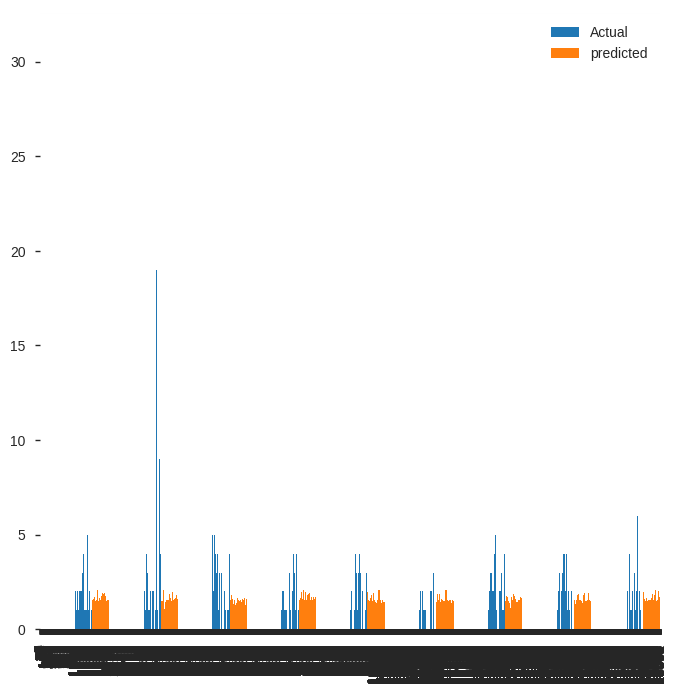

In [64]:
# Actual vs Predition plot
compar.plot(kind="bar",figsize=(8,8))
plt.show()

### **Model 2: Predict how many goals the away team scores**

In [0]:
X = fifa_main['rank'].values.reshape(-1,1)
y = fifa_main['away_score']

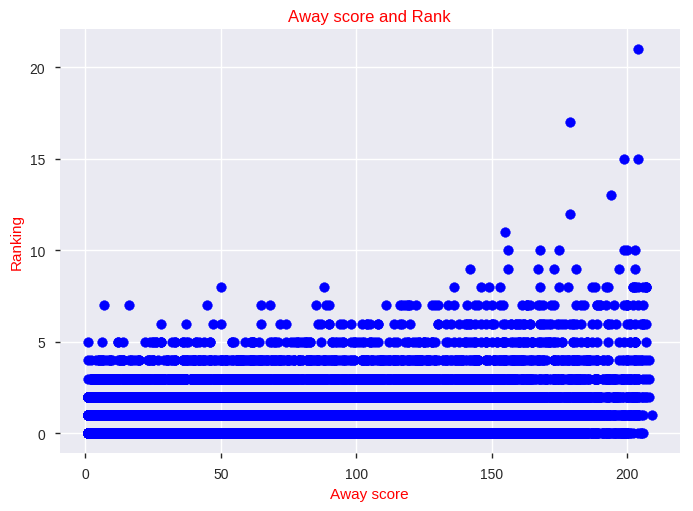

In [66]:
plt.scatter(X,y, color="blue")
plt.title("Away score and Rank",color = "red")
plt.xlabel("Away score", color = "red")
plt.ylabel("Ranking", color = "red")
plt.show()

In [0]:
# Train the Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.22, random_state=0)

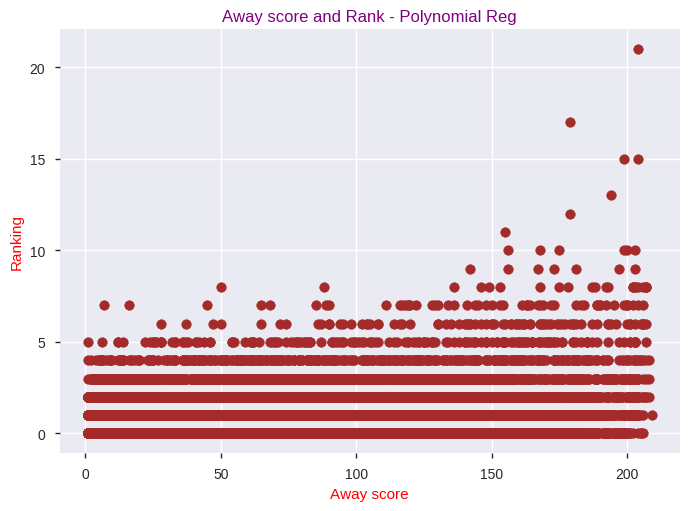

In [68]:
# fITTING Polynomial Regression
pol_reg = PolynomialFeatures(degree=3)
p_reg = pol_reg.fit_transform(X)

# Linear
poly_reg = LinearRegression()
poly_reg.fit(p_reg,y)

plt.scatter(X,y, color="brown")
plt.title("Away score and Rank - Polynomial Reg",color = "purple")
plt.xlabel("Away score", color = "red")
plt.ylabel("Ranking", color = "red")
plt.show()

In [69]:
prediction = poly_reg.predict(p_reg)
print("Polynomial prediction is: ", prediction)

Polynomial prediction is:  [0.84491802 1.00584998 0.86602829 ... 0.78703602 0.73764194 0.80486425]



###**Heteroskedasticity testing and Bartlett's test**

### Refers to the circumstance in which the variability of a variable is

### unequal across the range of values of a second variable that predicts it

In [0]:
# Bartlett's Test
# is used to test that variances are equal for all samples. 
# It checks that the assumption of equal variances is true before running certain statistical tests 

In [71]:
testing=np.subtract(X_predict, y)
pd.DataFrame(testing).describe()

,away_score
count,18609.000000
mean,0.547907
std,1.319038
min,-20.029187
25%,-0.238903
50%,0.666411
75%,1.539618
max,2.118785


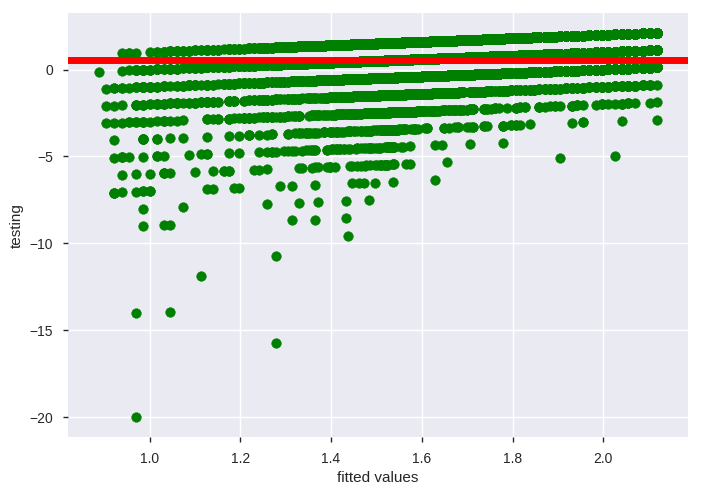

In [72]:
plt.scatter(X_predict,testing,color="green")
plt.ylabel("testing")
plt.xlabel('fitted values')
plt.axhline(y= testing.mean(), color='red', linewidth=5)
plt.show()

In [73]:
# Barlette's testing
# is used to test that variances are equal for all samples. 
# It checks that the assumption of equal variances is true before running certain statistical tests 
test_result, p_value = sc.stats.bartlett(X_predict, testing)

# Find critical value
degree_of_freedom = len(X_predict)-1
probability = 1 - p_value

critical_value = sc.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# Discover a pattern, Wether Unequal or Homogenous

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


In [74]:
print("Test result is ",test_result)

Test result is  44717.201038279505


In [75]:
print("critical value is ",critical_value)

critical value is  inf


### **Cross validation**

In [219]:
## Used KFold to train the model with the RMSE
from sklearn.model_selection import KFold
folds = KFold(n_splits=5)

# we can figure out how many folds we set up
# for it using get_n_splits

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')
# We now create and assess 5 models based on the folds we created.

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help

for train_index, test_index in folds.split(X):
 print('\nTraining model ' + str(count))
 # set up the train and test based on the split determined by KFold
 
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
 # fit a model accordingly
 regressor = LinearRegression()
 regressor.fit(X_train, y_train)
 # assess the accuraccy of the model
 pred = regressor.predict(X_test)
 rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, pred))
 RMSES.append(rmse_value)
 print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
 count = count + 1
    

we are using 5 folds

Training model 0
Model 0 Root Mean Squared Error: 1.7231794037183215

Training model 1
Model 1 Root Mean Squared Error: 1.8668982731551316

Training model 2
Model 2 Root Mean Squared Error: 1.5586734667714777

Training model 3
Model 3 Root Mean Squared Error: 1.5285923416020057

Training model 4
Model 4 Root Mean Squared Error: 1.5117012636121208


In [220]:
# The mean of RMSE
np.mean(RMSES)

1.6378089497718116

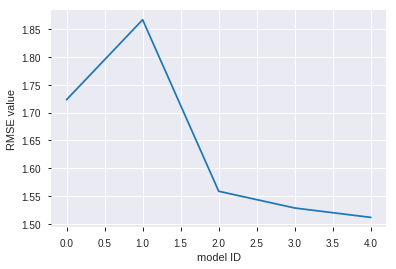

In [221]:
# Plotting

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

### **Model Id 1 boost of an RMSE score of 1.86**

## **Logistic Regression**`

**What is it?**

*It is a Machine learning classification algorithm that is

used to find the probability of a categorical dependent variable

ie Binary Logistic regression
0's and 1's*


### *Objective - Find if the game is a Win, Lose or Draw *

### *Data Exploration*

In [0]:
# Find Value Counts
away = fifa_main['away_team'].value_counts()
away

In [0]:
fifa_main['away_team'].unique()

In [0]:
fifa_main.head(1)

In [0]:
sns.countplot(x=fifa_main['neutral'],data=fifa_main,palette="hls")
plt.show()
plt.savefig('count_plot')

In [0]:
away_score = fifa_main['rank']

In [213]:
# Group away score by rank
rank = away_score.groupby(fifa_main['away_score']).sum()
pd.DataFrame(rank)


,rank
away_score,
0,528568.0
1,467364.0
2,268983.0
3,119748.0
4,48093.0
5,19142.0
6,12225.0
7,7866.0
8,3844.0


In [0]:
pd.crosstab(fifa_main.away_score,fifa_main.previous_points).plot(kind='bar')

In [0]:
fifa_main.head(1)

In [0]:
# Dropping unneccesary columns 
# home_team,away_team
fifa_l = fifa_main.drop(['date','city','country','year','rank_date'],axis=1,inplace=True)
fifa_l

In [0]:
fifa_main.dtypes

In [0]:
fifa_main['goal_dif'] = fifa_main.home_score  - fifa_main.away_score

# Creating an outcome
# goals more than 0 represent win
# gooals less than 0 represent Loss

def home_performance(goals):
    if goals > 0:      
        return 'Win'
    elif goals < 0:    
        return 'Loss'
    else:
        return 'Draw'
fifa_main['home_performance'] = fifa_main.goal_dif.apply(lambda x:home_performance(x))

In [0]:
# sns.countplot('home_dif',data = fifa)
# plt.xlabel("Status",fontsize=15)
# plt.ylabel("Frequency",color)
# plt.title("Countplot of Status",fontsize=16,color="maroon")
# plt.show()

In [0]:
#  home team’s perspective if the game is a Win
# Convert to dummy variable
# Convert categ-orical variable to dummy.. ie home team  
# What to Convert 
# tournament
# confederation

tournament = pd.get_dummies(fifa_main['tournament'], drop_first=True)
tournament

In [0]:
# Convert  confereration
confederation = pd.get_dummies(fifa_main['confederation'], drop_first=True)
confederation 

In [222]:
fifa_main.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,away_team_rank,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,home_team_rank,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y,rank,total_points,previous_points,rank_change,confederation,rank_date,goal_dif,home_performance
17910,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,19.0,COL,0.0,36.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,19.0,COL,0.0,36.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,19.0,0.0,36.0,16.0,CONMEBOL,1993-08-08,0,Draw


In [0]:
X = fifa_main[['home_team_rank','away_team_rank','previous_points_x','rank_change_x','rank_change_y']]
y = fifa_main['home_performance']

In [233]:
# Training the Dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
classify=LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
classify.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Make the prediction
y_pred=classify.predict(X_test)

In [237]:

cm=confusion_matrix(y_test, y_pred)
acc=accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
#print('F1 score; ', f1_score(y_test, y_pred))
print('Accuracy; ', acc)
print(cm)

              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00       918
        Loss       0.50      0.34      0.40      1041
         Win       0.52      0.88      0.66      1846

    accuracy                           0.52      3805
   macro avg       0.34      0.41      0.35      3805
weighted avg       0.39      0.52      0.43      3805

Accuracy;  0.519053876478318
[[   0  132  786]
 [   0  352  689]
 [   0  223 1623]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


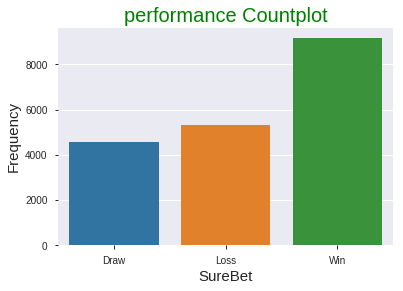

In [245]:
sns.countplot('home_performance',data = fifa_main)
plt.xlabel("SureBet",fontsize=15) # Drwa, loss,win
plt.ylabel("Frequency",fontsize=15)
plt.title("performance Countplot",color="green",fontsize=20)
plt.show()

### **I conclude by saying that my model had an accuracy score of 52% which is relatively low, a solution to this would be comming up with more data points, that might help increase the accuracy**